<a href="https://colab.research.google.com/github/burakkilicaslan/Data-Science-Projects/blob/master/Autoencoder_with_CNN_and_Dense_Layers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder with CNN and Dense Layers

### **1.   Setting infrastructure and Import Required Libraries**



In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

### **2.   Load and Preview Data**


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
# Preview data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
[7 2 1 ... 4 5 6]


### **3.   Data Preprocessing**

In [0]:
# we will use train data for auto encoder training
# We reshape our data to use cnn 
x_train_cnn = x_train.reshape(60000, 28, 28, 1)
x_test_cnn = x_test.reshape(10000, 28, 28, 1)
print(x_train_cnn.shape)

# We reshape our data to use dense layer(fully connected layer)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train_cnn = x_train_cnn.astype('float32')
x_test_cnn = x_test_cnn.astype('float32')
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale
x_train_cnn /= gray_scale
x_test_cnn /= gray_scale

(60000, 28, 28, 1)


### **4.   Build First Model with Dense Layers**

In [0]:
# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))
# encoder layer. It is choosen 500 neurons
encoder = Dense(500, kernel_initializer= initializers.Orthogonal(gain=1.0, seed=22), activation='relu')(input_img)

# embedded layer. it is choosen 50 neurons 
embedded = Dense(50, kernel_initializer= initializers.Orthogonal(gain=1.0, seed=22), activation='relu')(encoder)

# decoder layer. It is choosen 500 neurons
decoder = Dense(500, kernel_initializer= initializers.Orthogonal(gain=1.0, seed=22), activation='relu')(embedded)

# output layer.
output = Dense(784,kernel_initializer= initializers.Orthogonal(gain=1.0, seed=22), activation='sigmoid')(decoder)

# We create our nn models. 
autoencoder = Model(inputs=input_img, outputs=output)

In [0]:
# We compile our model with adam optimizer and mse loss function. 

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# We train our model. loss and validation loss can be viewed. 

autoencoder.fit(x_train, x_train, epochs=5, batch_size=32, shuffle=True, validation_data=(x_test, x_test))
print()

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0170 - val_loss: 0.0077
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0048 - val_loss: 0.0047



In [0]:
# We create seperately encoder model to visualize data points  
encoder = Model(inputs=input_img, outputs=embedded)

In [0]:
# get embedded fcnn vector for visualization embedded data points 
embedded_vector = encoder.predict(x_test)
print(embedded_vector.shape)

# get our autoencoders result to visualize reconstructed image
reconstructed_imgs= autoencoder.predict(x_test)
print(reconstructed_imgs.shape)

(10000, 50)
(10000, 784)


### **4.   Build Second Model with CNN Layers**

In [0]:
input_img = Input(shape=(28, 28, 1))

# we create cnn layer with filter number is 2 and kernel size is (3X3). 
cnn_layer = Conv2D(2,(3, 3),kernel_initializer= initializers.Orthogonal(gain=1.0, seed=22),  activation='relu', padding='same')(input_img)
cnn_layer = MaxPooling2D((2, 2), padding='same')(cnn_layer)

embedded_cnn = Flatten()(cnn_layer)

# decoder layer. It is choosen 500 neurons
decoded= Dense(500, kernel_initializer= initializers.Orthogonal(gain=1.0, seed=22), activation='relu')(embedded_cnn)

# output layer.
output_cnn = Dense(784, kernel_initializer= initializers.Orthogonal(gain=1.0, seed=22), activation='sigmoid')(decoded)

autoencoder_cnn = Model(inputs=input_img, outputs=output_cnn)

In [0]:
print(embedded_cnn.shape)


(None, 392)


In [0]:
autoencoder_cnn.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error,)

history = autoencoder_cnn.fit(x_train_cnn, x_train, epochs=25, batch_size=32, validation_data=(x_test_cnn, x_test))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0126 - val_loss: 0.0049
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 10/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.002

In [0]:
encoder_cnn = Model(inputs=input_img, outputs=embedded_cnn)

In [0]:
# get embedded cnn vector for visualization embedded data points 
embedded_vector_cnn = encoder_cnn.predict(x_test_cnn)
print(embedded_vector_cnn.shape)

# get our autoencoders result to visualize reconstructed image
reconstructed_imgs_cnn= autoencoder_cnn.predict(x_test_cnn)
print(reconstructed_imgs_cnn.shape)

(10000, 392)
(10000, 784)


### **5.   Data Visualization** 

In [0]:
# We use tsne library to compress our model dimensions to plot.
tsne = TSNE(n_components=2)
test_embedding = tsne.fit_transform(embedded_vector)

In [0]:
print(test_embedding.shape)

(10000, 2)


In [0]:
test_original = tsne.fit_transform(x_test)

In [0]:
# We use tsne library to compress our model dimensions to plot.
test_embedding_cnn = tsne.fit_transform(embedded_vector_cnn)

In [0]:
# Evaluate our results.
print(test_embedding.shape)
print(test_embedding_cnn.shape)
print(test_original.shape)
print(y_test.shape)

y_test_new = y_test.reshape(10000,1)

# We append y values for label to our embedding results
test_embedding_plot = np.append(test_embedding, y_test_new, 1)

# We append y values for label to our originals data points
test_original_plot = np.append(test_original, y_test_new, 1)

# We append y values for label to our embedding_cnn results
test_embedding_cnn_plot = np.append(test_embedding_cnn, y_test_new, 1)

(10000, 2)
(10000, 2)
(10000, 2)
(10000,)


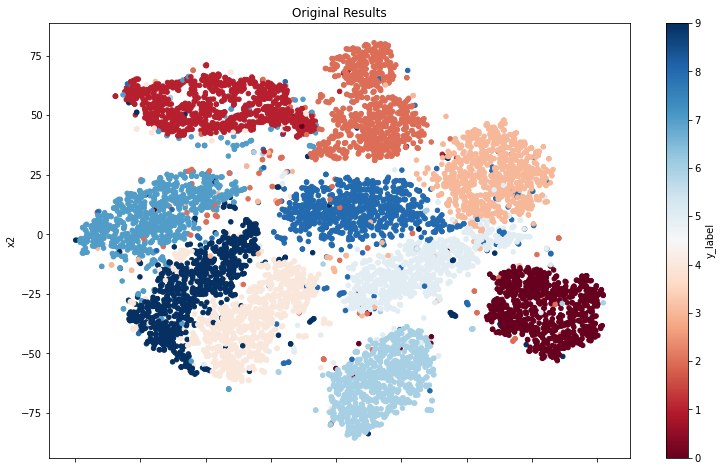

In [0]:
# I use pandas dataframe to create scatter plot. Pandas dataframe is easy more stuctured.
dataframe_original = pd.DataFrame(test_original_plot, columns=['x1', 'x2', 'y_label'])

# I use pandas dataframe scatter to create scatter plot.
ax2 = dataframe_original.plot.scatter(x='x1', y='x2', c='y_label', colormap='RdBu', figsize=(13,8), title="Original Results")

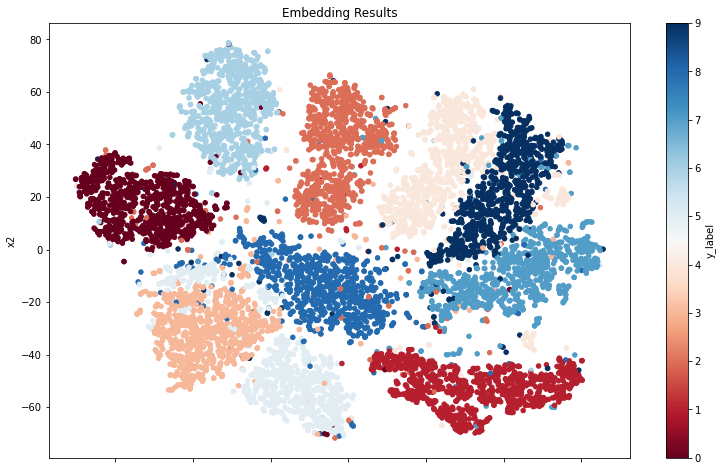

In [0]:
dataframe_embedding = pd.DataFrame(test_embedding_plot, columns=['x1', 'x2', 'y_label'])

ax1 = dataframe_embedding.plot.scatter(x='x1', y='x2', c='y_label', colormap='RdBu', figsize=(13,8), title="Embedding Results")

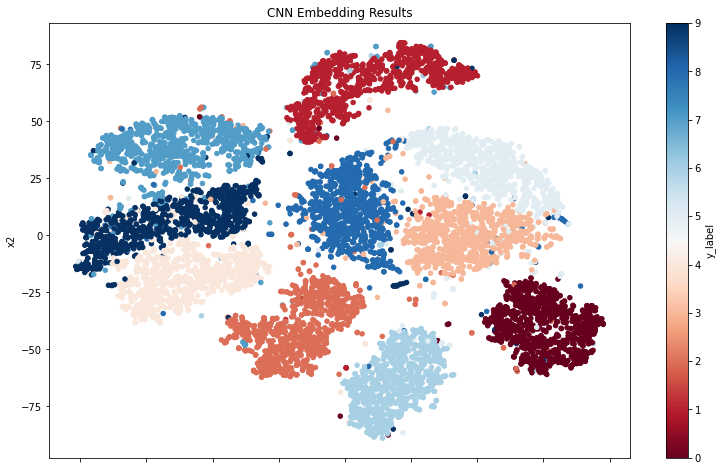

In [0]:
dataframe_cnn_embedding = pd.DataFrame(test_embedding_cnn_plot, columns=['x1', 'x2', 'y_label'])

ax3 = dataframe_cnn_embedding.plot.scatter(x='x1', y='x2', c='y_label', colormap='RdBu', figsize=(13,8), title="CNN Embedding Results")

### **6.   Evaluate our Autoencoder model - Compare to Original Images with Reconstructed Image** 

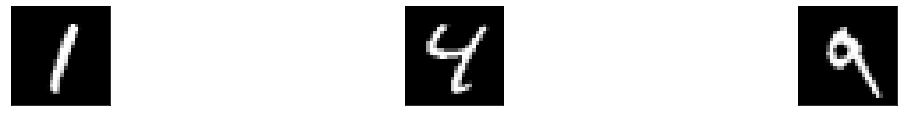

In [0]:
plt.figure(figsize=(20, 4))
for i in range(3): # we will display 3 images.
    # display original
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[i+5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

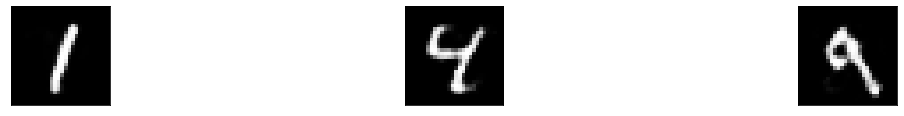

In [0]:
plt.figure(figsize=(20, 4))
for i in range(3): # we will display 3 images.

    # display reconstructed image
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(reconstructed_imgs[i+5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

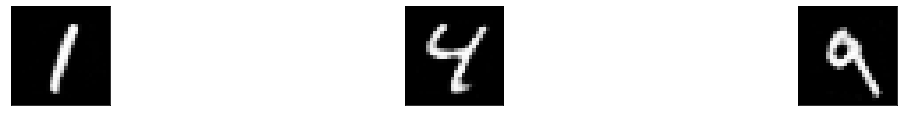

In [0]:
plt.figure(figsize=(20, 4))
for i in range(3): # we will display 3 images.

    # display reconstructed image
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(reconstructed_imgs_cnn[i+5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()